![cover](cover.jpg)


# Executive Summary

This report presents the analysis of Ozone Concentration in the California State in 2024. It mainly focuses on temporal and regional aspects, and analyzes the patterns and nuances regarding the parts of California in terms of seasons, land, and urban activity.

Firstly, the reporter cleaned the dataset by dropping null values, removing unnecessary columns, and standardizing date format. These are necessary operations for data analysis to run smoother and more accurately.

Then, the reporter moved on to EDA by checking outliers. Although there are outliers available, the reporter kept them to discover more patterns. After researching Ozone levels and AQI values, the reporter discovered that ozone levels are on the safe range, but the max AQI value falls on the purple zone (very unhealthy). 

It was also discovered that the ozone levels were elevated during summer time, however, the plot still had fluctuations over the entire year, suggesting that aside from weather, urban activity or wildfires may have affected these changes. Ozone levels also vary according to regions, it is specifically high on Southern California counties like San Bernardino, low on Northern counties like San Francisco. Although weather is a significant factor, the researcher suspected the Line Fire that happened in San Bernardino in 2024. 

The day of the week also had an effect on ozone levels. While weekdays had higher ozone concentration, weekends had lower. After confirming this with t-test, it was discovered that the difference was significant. However, the actual mean difference between the two was not big in magnitude.

Lastly, the researcher plotted a geospatial heatmap to better visualize ozone levels across counties. To no surprise, Southern counties were significantly higher than Northern counties.

After all the steps were complete, the researcher proposed 4 recommendations for the State of California:

1. Focus on policies that target Southern California and other urbanized regions to control elevated ozone levels.
2. Promote clean transportation options to help reduce ozone levels on weekdays.
3. Encourage public transportation or introduce a more efficient transit system so that people avoid using private cars for daily commutes.
4. Implement stricter regulations for factories, car manufacturers, and related industries.

# Business Issue Understanding

Ozone pollution has been a hot topic for years primarily because it causes concerns for human health and agriculture. It leads to respiratory issues, damaged crop fields, and climate change. This report focuses on understanding the factors affecting ozone levels and identifying high-risk areas to recommend effective regulatory interventions.

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('data/ozone.csv')
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


Looking at the first few rows of the table, it can be seen that date column needs to be standardized, there are some unnecessary columns and some null values.

In [2]:
from IPython.display import display, HTML

# Columns with missing values and how many are missing
missing_cols = df.isna().sum()
missing_cols = missing_cols[missing_cols > 0]
display(HTML("<b>Columns with missing values:</b>"))
print(missing_cols)

Daily Max 8-hour Ozone Concentration    2738
Daily AQI Value                         2738
Method Code                             6490
CBSA Code                               2408
CBSA Name                               2408
dtype: int64


As seen above, several columns contain missing values. Since these are important columns that will be used in the data analysis, the researcher will drop the rows with missing values to maintain data quality and ensure accurate results.

# Data Preparation

## Dropping Rows with Null Values in Ozone Concentration and AQI Value

The main focus in this report is air quality and ozone concentration. Since the reporter will be using the "Daily Max 8-hour Ozone Concentration" and "Daily AQI Value" columns,  the rows with null values in these fields will be removed to maintain data quality for the analysis. Other columns with null values won't be used, so they will be dropped entirely.

In [3]:
# Making a copy of the original dataframe
df_cleaned = df.copy()

# Converting empty values to NaN
df_cleaned[["Daily Max 8-hour Ozone Concentration", "Daily AQI Value"]] = df_cleaned[["Daily Max 8-hour Ozone Concentration", "Daily AQI Value"]].replace(r'^\s*$', np.nan, regex=True)

# Dropping rows with empty values in these columns
df_cleaned = df_cleaned.dropna(subset=["Daily Max 8-hour Ozone Concentration", "Daily AQI Value"])

In [4]:
# Printing columns with empty values
nan_counts = df_cleaned.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
display(HTML("<b>Columns with missing values:</b>"))
print(nan_counts)

Method Code    5893
CBSA Code      2181
CBSA Name      2181
dtype: int64


## Removing Unnecessary Columns

Now only Method Code, CBSA Code, and CBSA Name have empty values. These will be removed alongside other unnecessary columns so that the codes run more efficient.

In [5]:
# List of columns to drop
columns_to_drop = ["Source", "Site ID", "POC", "Units", "Local Site Name", "Daily Obs Count", "Percent Complete", "Method Code", "CBSA Code", "CBSA Name", "County FIPS Code"]

# Dropping the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned.head()

,Date,Daily Max 8-hour Ozone Concentration,Daily AQI Value,County,Site Latitude,Site Longitude
0,/2024,0.031,29.0,Alameda,37.687526,-121.784217
1,01/02/2024,0.037,34.0,Alameda,37.687526,-121.784217
3,January 04/2024,0.026,24.0,Alameda,37.687526,-121.784217
4,January 05/2024,0.027,25.0,Alameda,37.687526,-121.784217
5,January 06/2024,0.031,29.0,Alameda,37.687526,-121.784217


## Standardizing date format

After reviewing the dataset, the reporter noticed that the Date column generally follows an arithmetic pattern in the MM/DD/YYYY format. However, some entries are inconsistent, such as "January 04/2024" or just "/2024". In this section, the author will standardize month names into a consistent date format and remove rows with "/2024" values. These entries cannot be reliably fixed or inferred, as the date sequence is not continuous. For example, it sometimes jumps from June 30 to July 22. In such cases, the actual date behind a "/2024" entry is unknown and cannot be assumed.

In [6]:
df_final = df_cleaned.copy()

# Removing rows where date value is /2024
df_final = df_final[~df_final['Date'].str.strip().eq("/2024")]

In [7]:
# Removing leading/trailing spaces
df_final['Date'] = df_final['Date'].str.strip()

# Parsing month-name formats like "January 07/2024"
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce', format='%B %d/%Y').fillna(df_final['Date'])

# Parsing values still in MM/DD/YYYY format
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce', format='%m/%d/%Y')
df_final['Date'] = pd.to_datetime(df_final['Date']).dt.strftime('%m/%d/%Y')

df_final.head()

,Date,Daily Max 8-hour Ozone Concentration,Daily AQI Value,County,Site Latitude,Site Longitude
1,01/02/2024,0.037,34.0,Alameda,37.687526,-121.784217
3,01/04/2024,0.026,24.0,Alameda,37.687526,-121.784217
4,01/05/2024,0.027,25.0,Alameda,37.687526,-121.784217
5,01/06/2024,0.031,29.0,Alameda,37.687526,-121.784217
6,01/07/2024,0.030,28.0,Alameda,37.687526,-121.784217


## Correcting a Value

Here, the reporter realized that one county name was labelled as 'SF' which should be San Francisco. This correction will help the analysis be more accurate and clean.

In [8]:
df_final['County']=df_final['County'].replace({'SF': 'San Francisco'})

# Exploratory Data Analysis

## Checking for Outliers

In [9]:
def find_outliers_IQR(df_final):
   q1=df_final.quantile(0.25)
   q3=df_final.quantile(0.75)
   IQR=q3-q1
   outliers = df_final[((df_final<(q1-1.5*IQR)) | (df_final>(q3+1.5*IQR)))]
   return outliers

display(HTML("<b>Outliers of 'Daily Max 8-hour Ozone Concentration'</b>"))
outliers = find_outliers_IQR(df_final["Daily Max 8-hour Ozone Concentration"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

display(HTML("<b>Outliers of 'Daily AQI Value'</b>"))
outliers = find_outliers_IQR(df_final["Daily AQI Value"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 961
max outlier value: 0.131
min outlier value: 0.0


number of outliers: 4780
max outlier value: 227.0
min outlier value: 0.0


Although Daily Max 8-hour Ozone Concentration has outliers, its maximum value of 0.131 ppm does not reach the danger level defined by ozonesolutions.com. This means that the measurements were taken either indoors (0 ppm) or in thunderstorm (0.131 ppm). See Fig 1 for Ozone Levels Chart provided by ozonesolutions.com.

As for Daily AQI Value, its maximum value is 227 which is in the very unhealthy (purple) range. According to airnow.gov, this number causes increased risk of health hazards. See Fig 2 for AQI Basics for Ozone and Particle Pollution chart provided by airnow.gov.

### Fig. 1 Ozone Levels Chart

![ozone-chart](ozone-chart.png)


### Fig. 2 AQI Basics for Ozone and Particle Pollution

![aqi-chart](aqi-chart.png)


## Scatterplot of Ozone levels & AQI values

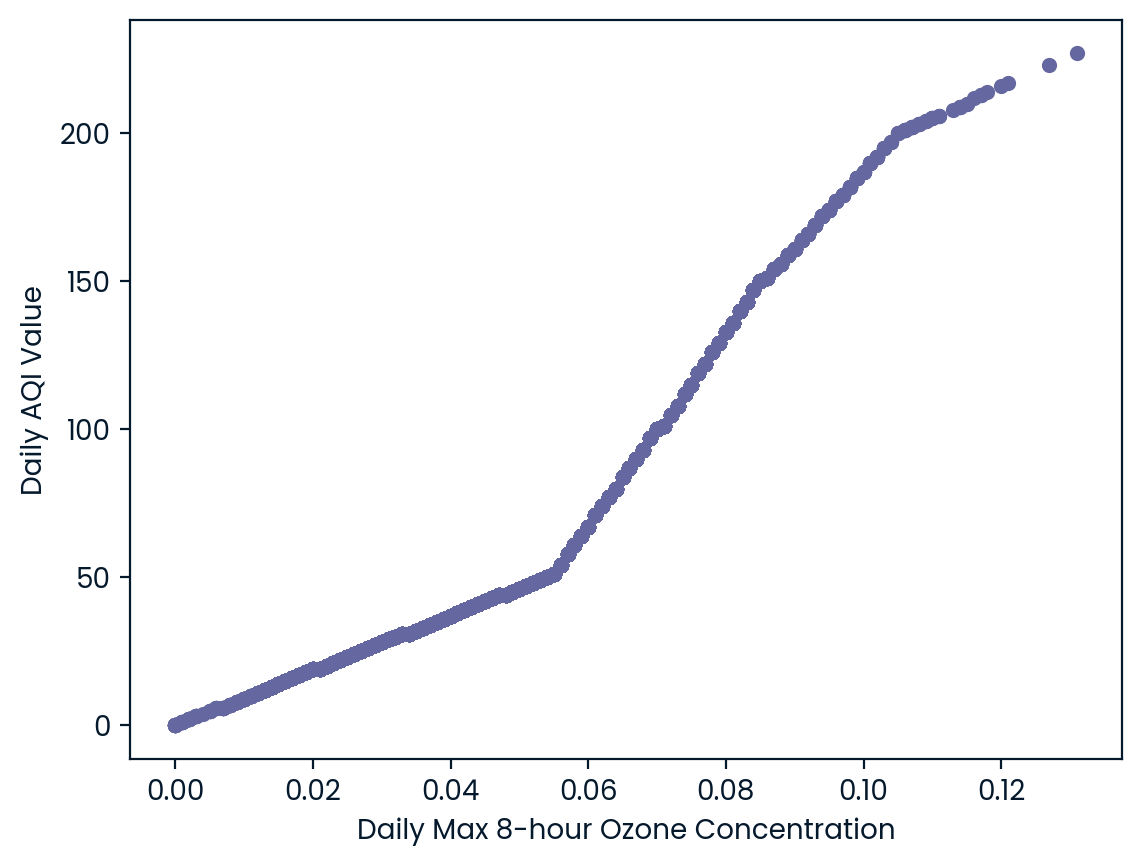

In [10]:
# Creating a scatter plot
df_final.plot.scatter(x='Daily Max 8-hour Ozone Concentration', y='Daily AQI Value')

plt.show()

It can be seen here that AQI values and Ozone levels have a strong positive non-linear relationship. As the ozone concentration increases, the AQI value also increases, and the curve steepens. This is expected as AQI is a derived index that scales with pollutant concentration, which Ozone is one of them.

## Ozone Concentration Over Time

In [11]:
import plotly.express as px

df_DateOzone = df_final.groupby('Date', as_index=False)['Daily Max 8-hour Ozone Concentration'].mean()
df_DateOzone['Daily Max 8-hour Ozone Concentration'] = df_DateOzone['Daily Max 8-hour Ozone Concentration'].round(4)

fig = px.line(df_DateOzone, x="Date", y="Daily Max 8-hour Ozone Concentration", title='Ozone Concentration 2024')
fig.show()

There is a seasonal pattern in the line chart: The ozone concentration increases with ups and downs from January to July, it then starts to decline from July to December. Ozone concentration is higher in summer due to high temperatures and solar radiation, and lower in winter due to cool temperatures.

A lot of fluctuations can also be seen on the short term observations. This could be caused by sudden weather changes, wildfires, industrial activities, etc.

## Ozone Concentration Over **Regions**

In [12]:
# Grouping by ozone levels and county
df_Reg = df_final.groupby('County', as_index=False)['Daily Max 8-hour Ozone Concentration'].mean()
df_RegTop = df_Reg.nlargest(n=5, columns=['Daily Max 8-hour Ozone Concentration'])
df_RegBot = df_Reg.nsmallest(n=5, columns=['Daily Max 8-hour Ozone Concentration'])

fig1 = px.bar(df_RegTop, x="County", y="Daily Max 8-hour Ozone Concentration", title='Highest Ozone Emitting Counties')
fig2 = px.bar(df_RegBot, x="County", y="Daily Max 8-hour Ozone Concentration", title='Lowest Ozone Emitting Counties')
fig1.show()
fig2.show()

While San Bernardino ranked highest in ozone concentration, San Francisco ranked lowest. The reason why San Bernardino is ranked highest may be due to the "Line Fire" in 2024 that happened in the county. It started in Sept 5 and was contained one hundred percent on December 23. 

## Weekday vs. Weekend Ozone Concentration

In [13]:
df_final['Date'] = pd.to_datetime(df_final['Date'], format='%m/%d/%Y')

# Create new column for Weekday/Weekend classification
df_final['Day_Type'] = df_final['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# View result
print(df_final[['Date', 'Day_Type']].head())

        Date Day_Type
1 2024-01-02  Weekday
3 2024-01-04  Weekday
4 2024-01-05  Weekday
5 2024-01-06  Weekend
6 2024-01-07  Weekend


In [14]:
df_daytt = df_final.groupby('Day_Type', as_index=False)['Daily Max 8-hour Ozone Concentration'].mean()

dayt = px.line(df_daytt, x="Day_Type", y="Daily Max 8-hour Ozone Concentration", title='Highest Ozone Emitting Counties')
dayt.show()

### Confirming with T-test

In [15]:
from scipy.stats import ttest_ind

# Separate ozone values
weekday_ozone = df_final[df_final["Day_Type"] == "Weekday"]["Daily Max 8-hour Ozone Concentration"]
weekend_ozone = df_final[df_final["Day_Type"] == "Weekend"]["Daily Max 8-hour Ozone Concentration"]

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(weekday_ozone, weekend_ozone, equal_var=False)

# Output result
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.4314105820421
P-value: 0.015047762009763752


Since p < 0.05, the result is statistically significant. This means that ozone concentration on weekends is significantly lower than on weekdays. However, if we check the actual mean difference between the two, 0.0004 ppm, it's not high in magnitude. 

The high ozone levels on weekedays may be caused from intense traffic because of working hours. 

## Geospatial Heatmap for High Ozone Concentrations

In [16]:
# Filter for high ozone values (top 10%)
threshold = df_final["Daily Max 8-hour Ozone Concentration"].quantile(0.90)
df_high = df_final[df_final["Daily Max 8-hour Ozone Concentration"] >= threshold]

# Create heatmap
fig = px.density_mapbox(
    df_high,
    lat="Site Latitude",
    lon="Site Longitude",
    z="Daily Max 8-hour Ozone Concentration",
    radius=10,
    center=dict(lat=df_high["Site Latitude"].mean(), lon=df_high["Site Longitude"].mean()),
    zoom=5,
    mapbox_style="carto-positron",
    title="Geospatial Heatmap of High Ozone Concentrations (Top 10%)"
)

fig.show()

The heatmap shows elevated ozone levels in Southern California especially around Los Angeles, San Bernardino and Riverside counties. Northern California counties such as San Francisco and Sonoma. High ozone levels in Southern part is likely caused by urban and industrialized areas.

# Conclusions

1. Southern California counties suffer the most from high ozone concentrations.
2. Ozone levels on weekdays are significantly higher compared to weekends.
3. Ozone levels are higher in summer due to high temperatures and solar radiation.

# Recommendations

1. Focus on policies that target Southern California and other urbanized regions to control elevated ozone levels.
2. Promote clean transportation options to help reduce ozone levels on weekdays.
3. Encourage public transportation or introduce a more efficient transit system so that people avoid using private cars for daily commutes.
4. Implement stricter regulations for factories, car manufacturers, and related industries.